In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
in_coord = np.array([[11973,1977],
 [10671,5019],
 [13977,3009],
 [3975,7780],
 [11973,1977]])

In [9]:
class ConfigurePlanning:
    def __init__(self):
        self.index = -2
        self.size = 1
        self.planning_knowed = 0
        self.right = -0.7
        self.left = +0.5

def bezier(points, steps=10):
    n = len(points)
    b = [scipy.special.binom(n - 1, i) for i in range(n)]
    r = np.arange(n)
    
    for t in np.linspace(0, 1, steps):
        u = (np.power(t, r) * np.power(1 - t, n - r - 1) * b)
        yield t, u @ points

def split_line(bezier_coord, in_coord, planning):
    if planning.planning_knowed :
        pass

    elif planning.index == -2 :
        pass
    
    elif planning.index == -1 :
        (size, dim) = in_coord.shape
        planning.size = size
        
        for i in range(0, size-1):
            
            x1 = in_coord[i,0]
            y1 = in_coord[i,1]
            x2 = in_coord[i+1,0]
            y2 = in_coord[i+1,1]
    
            somme_x = (x1 + x2) / 2
            difference_x = (x1 - x2) / 2
    
            somme_y = (y1 + y2) / 2
            difference_y = (y1 - y2) / 2

            point_entre_1et2_x = somme_x + planning.left * difference_x
            point_entre_1et2_y = somme_y + planning.left * difference_y
    
            (size, dim) = bezier_coord.shape
            if size == 1:
                bezier_coord = np.array([[point_entre_1et2_x, point_entre_1et2_y],])
            else:
                add = np.array([[point_entre_1et2_x, point_entre_1et2_y],])
                bezier_coord = np.concatenate((bezier_coord, add))
    
            point_entre_1et2_x = somme_x + planning.right * difference_x
            point_entre_1et2_y = somme_y + planning.right * difference_y
    
            add = np.array([[point_entre_1et2_x, point_entre_1et2_y],])
            bezier_coord = np.concatenate((bezier_coord, add))
        
            add = np.array([[x2, y2],])
            bezier_coord = np.concatenate((bezier_coord, add))
        
        add = np.array([bezier_coord[0]])
        first = np.array(bezier_coord[1:])
        bezier_coord = np.concatenate((first, add))
        #print("bezier_coord {}".format(bezier_coord))
    return bezier_coord
    
def define_array_planning(plan_coord, bezier_coord, planning):
    if planning.planning_knowed :
        pass

    elif planning.index == -2 :
        pass
    
    elif planning.index == -1 :
        size = planning.size
        i = 3
        k = 0
        
        plan_coord = np.array([p for _, p in bezier(bezier_coord[k:k+i])])

        for j in range(0,size-2):
        #for j in range(0,3):
            k = k + 3;
            add = np.array([p for _, p in bezier(bezier_coord[k:k+i])])
            plan_coord = np.concatenate((plan_coord, add))
            
        #planning.planning_knowed = 1
    return plan_coord



In [50]:
i = 0
in_coord[i:i+2]

array([[11973,  1977],
       [10671,  5019]])

In [178]:
planning = ConfigurePlanning()
plan_coord  = np.array([[]])
bezier_coord  = np.array([[]])


in_coord [[11973  1977]
 [10671  5019]
 [13977  3009]
 [ 3975  7780]
 [11973  1977]]
bezier_coord [[10866.3   4562.7 ]
 [10671.    5019.  ]
 [11497.5   4516.5 ]
 [13481.1   3310.5 ]
 [13977.    3009.  ]
 [11476.5   4201.75]
 [ 5475.3   7064.35]
 [ 3975.    7780.  ]
 [ 5974.5   6329.25]
 [10773.3   2847.45]
 [11973.    1977.  ]
 [11647.5   2737.5 ]]


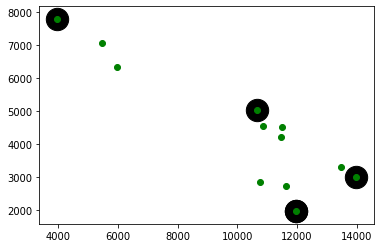

In [179]:
planning.index = -1
bezier_coord = split_line(bezier_coord,in_coord,planning)

print("in_coord {}".format(in_coord))
print("bezier_coord {}".format(bezier_coord))

fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.scatter(bezier_coord[:, 0], bezier_coord[:, 1], c='green')
#plt.scatter(curve_coord[:, 0], curve_coord[:, 1], c='red')
plt.show(plt)

In [168]:
add = np.array([bezier_coord[0]])
#add
first = np.array(bezier_coord[1:])
#first
bezier_coord = np.concatenate((first, add))
bezier_coord

array([[10866.3 ,  4562.7 ],
       [10671.  ,  5019.  ],
       [11497.5 ,  4516.5 ],
       [13481.1 ,  3310.5 ],
       [13977.  ,  3009.  ],
       [11476.5 ,  4201.75],
       [ 5475.3 ,  7064.35],
       [ 3975.  ,  7780.  ],
       [ 5974.5 ,  6329.25],
       [10773.3 ,  2847.45],
       [11973.  ,  1977.  ],
       [11647.5 ,  2737.5 ]])

size 5
bezier_coord [[10866.3   4562.7 ]
 [10671.    5019.  ]
 [11497.5   4516.5 ]
 [13481.1   3310.5 ]
 [13977.    3009.  ]
 [11476.5   4201.75]
 [ 5475.3   7064.35]
 [ 3975.    7780.  ]
 [ 5974.5   6329.25]
 [10773.3   2847.45]
 [11973.    1977.  ]
 [11647.5   2737.5 ]]
plan_coord [[10866.3         4562.7       ]
 [10835.51481481  4652.26296296]
 [10829.95925926  4718.15185185]
 [10849.63333333  4760.36666667]
 [10894.53703704  4778.90740741]
 [10964.67037037  4773.77407407]
 [11060.03333333  4744.96666667]
 [11180.62592593  4692.48518519]
 [11326.44814815  4616.32962963]
 [11497.5         4516.5       ]
 [13481.1         3310.5       ]
 [13554.30740741  3261.94753086]
 [13553.52962963  3250.29012346]
 [13478.76666667  3275.52777778]
 [13330.01851852  3337.66049383]
 [13107.28518519  3436.6882716 ]
 [12810.56666667  3572.61111111]
 [12439.86296296  3745.42901235]
 [11995.17407407  3955.14197531]
 [11476.5         4201.75      ]
 [ 5475.3         7064.35      ]
 [ 5185.10740741  7196.

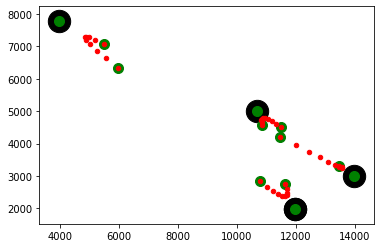

In [180]:
planning.index = -1
plan_coord  = np.array([[]])

plan_coord = define_array_planning(plan_coord,bezier_coord,planning)

print("bezier_coord {}".format(bezier_coord))
print("plan_coord {}".format(plan_coord))

fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.scatter(bezier_coord[:, 0], bezier_coord[:, 1], s=100, c='green')
plt.scatter(plan_coord[:, 0], plan_coord[:, 1], s=20, c='red')
plt.show(plt)

In [10]:
planning = ConfigurePlanning()
plan_coord  = np.array([[]])
bezier_coord  = np.array([[]])
planning.index = -1

-1
in_coord [[11973  1977]
 [10671  5019]
 [13977  3009]
 [ 3975  7780]
 [11973  1977]]
bezier_coord [[10866.3   4562.7 ]
 [10671.    5019.  ]
 [11497.5   4516.5 ]
 [13481.1   3310.5 ]
 [13977.    3009.  ]
 [11476.5   4201.75]
 [ 5475.3   7064.35]
 [ 3975.    7780.  ]
 [ 5974.5   6329.25]
 [10773.3   2847.45]
 [11973.    1977.  ]
 [11647.5   2737.5 ]]


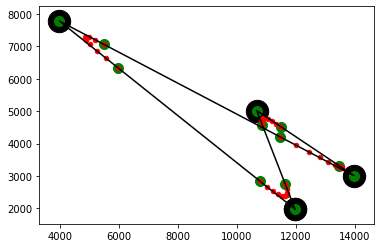

In [11]:
bezier_coord = split_line(bezier_coord,in_coord,planning)
plan_coord = define_array_planning(plan_coord,bezier_coord,planning)

print("in_coord {}".format(in_coord))
print("bezier_coord {}".format(bezier_coord))

fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.plot(in_coord[:, 0], in_coord[:, 1], c='black')
plt.scatter(bezier_coord[:, 0], bezier_coord[:, 1], s=100, c='green')
plt.scatter(plan_coord[:, 0], plan_coord[:, 1], s=20, c='red')
plt.show(plt)

In [156]:
add = np.array([bezier_coord[0]])
add

first = np.array(bezier_coord[1:-1])
#bezier_coord = np.concatenate((bezier_coord, add))
#print("bezier_coord {}".format(bezier_coord))

#first
bezier_coord = np.concatenate((first, add))
bezier_coord


array([[10671.  ,  5019.  ],
       [11497.5 ,  4516.5 ],
       [13481.1 ,  3310.5 ],
       [13977.  ,  3009.  ],
       [11476.5 ,  4201.75],
       [ 5475.3 ,  7064.35],
       [ 3975.  ,  7780.  ],
       [ 5974.5 ,  6329.25],
       [10773.3 ,  2847.45],
       [10866.3 ,  4562.7 ]])